## Aim:

The aim of this project is to explore and analyze the Netflix shows data after filtering some of the columns. This Netflix movies and TV shows data has 8807 entries (that are rows) and 12 columns. We will alter and filter some columns,unnesting of the data in columns and perform  some feature engineering after this we prepare data for analysis.Then Perform the data visualization on various factors.In the end, we will conclude the result of the analysis.

### Dataset

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
To: /content/netflix.csv
100% 3.40M/3.40M [00:00<00:00, 61.9MB/s]


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('netflix.csv')

In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [ ]:
# Date_added here is of type 'object', but it should be of type datetime
data['date_added'] = pd.to_datetime(data['date_added'])

#creating new year added and month added column
data['year_added']=data['date_added'].dt.year
data['month_added']=data['date_added'].dt.month

In [ ]:
data.shape

(8807, 14)

In [ ]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added'],
      dtype='object')

In [ ]:
data.isnull()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
year_added        10
month_added       10
dtype: int64

In [ ]:
data.describe()

,release_year,year_added,month_added
count,8807.000000,8797.000000,8797.000000
mean,2014.180198,2018.871888,6.654996
std,8.819312,1.574243,3.436554
min,1925.000000,2008.000000,1.000000
25%,2013.000000,2018.000000,4.000000
50%,2017.000000,2019.000000,7.000000
75%,2019.000000,2020.000000,10.000000
max,2021.000000,2021.000000,12.000000


In [ ]:
constraint=data['director'].apply(lambda x: str(x).split(', ')).tolist()
data_new=pd.DataFrame(constraint,index=data['title'])
data_new=data_new.stack()
data_new=pd.DataFrame(data_new)
data_new.reset_index(inplace=True)
data_new_director=data_new[['title',0]]
data_new_director.columns=['title','director']
data_new_director

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan
...,...,...
9607,Zodiac,David Fincher
9608,Zombie Dumb,nan
9609,Zombieland,Ruben Fleischer
9610,Zoom,Peter Hewitt


In [ ]:
constraint=data['cast'].apply(lambda x: str(x).split(', ')).tolist()
data_new=pd.DataFrame(constraint,index=data['title'])
data_new=data_new.stack()
data_new=pd.DataFrame(data_new)
data_new.reset_index(inplace=True)
data_new_cast=data_new[['title',0]]
data_new_cast.columns=['title','cast']
data_new_cast

,title,cast
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64946,Zubaan,Manish Chaudhary
64947,Zubaan,Meghna Malik
64948,Zubaan,Malkeet Rauni
64949,Zubaan,Anita Shabdish


In [ ]:
constraint=data['country'].apply(lambda x: str(x).split(', ')).tolist()
data_new=pd.DataFrame(constraint,index=data['title'])
data_new=data_new.stack()
data_new=pd.DataFrame(data_new)
data_new.reset_index(inplace=True)
data_new_country=data_new[['title',0]]
data_new_country.columns=['title','country']
data_new_country

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India
...,...,...
10840,Zodiac,United States
10841,Zombie Dumb,nan
10842,Zombieland,United States
10843,Zoom,United States


In [ ]:
constraint=data['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
data_new=pd.DataFrame(constraint,index=data['title'])
data_new=data_new.stack()
data_new=pd.DataFrame(data_new)
data_new.reset_index(inplace=True)
data_new_gener=data_new[['title',0]]
data_new_gener.columns=['title','listed_in']
data_new_gener

,title,listed_in
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
...,...,...
19318,Zoom,Children & Family Movies
19319,Zoom,Comedies
19320,Zubaan,Dramas
19321,Zubaan,International Movies


In [ ]:
updated_data=data.merge(data_new_cast,on='title',how='left').merge(data_new_director,on='title',how='left').merge(data_new_country,on='title',how='left').merge(data_new_gener,on='title',how='left')

In [ ]:
updated_data.head()

,show_id,type,title,director_x,cast_x,country_x,date_added,release_year,rating,duration,listed_in_x,description,year_added,month_added,cast_y,director_y,country_y,listed_in_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,nan,Kirsten Johnson,United States,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,Ama Qamata,nan,South Africa,International TV Shows
2,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,Ama Qamata,nan,South Africa,TV Dramas
3,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,Ama Qamata,nan,South Africa,TV Mysteries
4,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,Khosi Ngema,nan,South Africa,International TV Shows


In [ ]:
updated_data.isnull()

,show_id,type,title,director_x,cast_x,country_x,date_added,release_year,rating,duration,listed_in_x,description,year_added,month_added,cast_y,director_y,country_y,listed_in_y
0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201986,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
201987,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
201988,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
201989,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
updated_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201991 entries, 0 to 201990
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       201991 non-null  object        
 1   type          201991 non-null  object        
 2   title         201991 non-null  object        
 3   director_x    151348 non-null  object        
 4   cast_x        199845 non-null  object        
 5   country_x     190094 non-null  object        
 6   date_added    201833 non-null  datetime64[ns]
 7   release_year  201991 non-null  int64         
 8   rating        201924 non-null  object        
 9   duration      201988 non-null  object        
 10  listed_in_x   201991 non-null  object        
 11  description   201991 non-null  object        
 12  year_added    201833 non-null  float64       
 13  month_added   201833 non-null  float64       
 14  cast_y        201991 non-null  object        
 15  director_y    201

In [ ]:
updated_data=updated_data[['show_id','type','title','director_y','cast_y','country_y','date_added','release_year','rating','duration','listed_in_y','description','year_added','month_added']]

In [ ]:
updated_data

,show_id,type,title,director_y,cast_y,country_y,date_added,release_year,rating,duration,listed_in_y,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0
1,s2,TV Show,Blood & Water,nan,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021.0,9.0
2,s2,TV Show,Blood & Water,nan,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021.0,9.0
3,s2,TV Show,Blood & Water,nan,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021.0,9.0
4,s2,TV Show,Blood & Water,nan,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201986,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,2019.0,3.0
201987,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,2019.0,3.0
201988,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...,2019.0,3.0
201989,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,2019.0,3.0


In [ ]:
updated_data=updated_data.rename({"director_y":"director","cast_y":"cast","country_y":"country","listed_in_y":"genres"},axis=1)

In [ ]:
updated_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0
1,s2,TV Show,Blood & Water,nan,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021.0,9.0
2,s2,TV Show,Blood & Water,nan,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021.0,9.0
3,s2,TV Show,Blood & Water,nan,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021.0,9.0
4,s2,TV Show,Blood & Water,nan,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201986,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,2019.0,3.0
201987,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,2019.0,3.0
201988,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...,2019.0,3.0
201989,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,2019.0,3.0


### **Converting String nan to **NaN****

In [ ]:
def change_null(x):
  if x=='nan':
    x=np.nan
  return x
updated_data['director']=updated_data['director'].apply(change_null)
updated_data['cast']=updated_data['cast'].apply(change_null)
updated_data['country']=updated_data['country'].apply(change_null)
updated_data['genres']=updated_data['genres'].apply(change_null)

In [ ]:
updated_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021.0,9.0
2,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021.0,9.0
3,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021.0,9.0
4,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201986,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,2019.0,3.0
201987,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,2019.0,3.0
201988,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...,2019.0,3.0
201989,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,2019.0,3.0


In [ ]:
updated_data.isnull()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,year_added,month_added
0,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201986,False,False,False,False,False,False,False,False,False,False,False,False,False,False
201987,False,False,False,False,False,False,False,False,False,False,False,False,False,False
201988,False,False,False,False,False,False,False,False,False,False,False,False,False,False
201989,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
updated_data.isnull().sum()

show_id             0
type                0
title               0
director        50643
cast             2146
country         11897
date_added        158
release_year        0
rating             67
duration            3
genres              0
description         0
year_added        158
month_added       158
dtype: int64

In [ ]:
for i in updated_data.columns:
    null_rate = updated_data[i].isna().sum() / len(updated_data) * 100 
    if null_rate > 0 :
        print("Percentage of Null Values in {}: {}%".format(i,round(null_rate,2)))

Percentage of Null Values in director: 25.07%
Percentage of Null Values in cast: 1.06%
Percentage of Null Values in country: 5.89%
Percentage of Null Values in date_added: 0.08%
Percentage of Null Values in rating: 0.03%
Percentage of Null Values in duration: 0.0%
Percentage of Null Values in year_added: 0.08%
Percentage of Null Values in month_added: 0.08%


Now I can see that there a missing percentages in the columns:

*   Director
*   Cast
*   Country
*   Date-added
*   Rating
*   Duration

For some columns(percentage greater than one) I will ignore these missing values, e.g cast and director. But I will fix some of the other columns. 

### Working with NAN values

Replacing 'Unknown' to the missing values in coulmns which is having null percentage more tha 1%

In [ ]:
updated_data['director'].fillna('Unknown', inplace=True)
updated_data['cast'].fillna('Unknown', inplace=True)
updated_data['country'].fillna('Unknown', inplace=True)

Performing imputation on columns having percentage less than 1%

In [ ]:
# 3 values are missing in duration

updated_data['duration'].isna().sum()

3

In [ ]:
# checking the missing data values

updated_data[updated_data['duration'].isna()] 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,year_added,month_added
126537,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi...",2017.0,4.0
131603,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...,2016.0,9.0
131737,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...,2016.0,8.0


There was a issue with rating and duration.
Duration data misplaced in rating column.
So replacing the values in duration column.

In [ ]:
updated_data.loc[[126537,131603,131737],'duration'] = updated_data.loc[[126537,131603,131737]]['rating'].values

In [ ]:
# making rating values null 

updated_data.loc[[126537,131603,131737],'rating'] = [np.NaN,np.NaN,np.NaN]   

In [ ]:
updated_data.loc[[126537,131603,131737]]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,year_added,month_added
126537,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi...",2017.0,4.0
131603,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...,2016.0,9.0
131737,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...,2016.0,8.0


In [ ]:
# since 0.03% of rating are missing so we will fill them using maximum occering value  which is mode

updated_data['rating'].fillna(updated_data['rating'].mode()[0], inplace=True)

In [ ]:
# The data in data_added column shows the date that the title was added to Netflix, this data may be hard to find, instead of wasting time,considering only not null values(removing/dropping null vales)

corrected_data=updated_data[updated_data['date_added'].notna()]

In [ ]:
# We are not using description column, so lets drop it

corrected_data.drop(['description'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# Dropping Duplicate values if there are any

corrected_data.drop_duplicates(inplace= True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
corrected_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201778 entries, 0 to 201990
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       201778 non-null  object        
 1   type          201778 non-null  object        
 2   title         201778 non-null  object        
 3   director      201778 non-null  object        
 4   cast          201778 non-null  object        
 5   country       201778 non-null  object        
 6   date_added    201778 non-null  datetime64[ns]
 7   release_year  201778 non-null  int64         
 8   rating        201778 non-null  object        
 9   duration      201778 non-null  object        
 10  genres        201778 non-null  object        
 11  year_added    201778 non-null  float64       
 12  month_added   201778 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 21.6+ MB


In [ ]:
corrected_data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
genres          0
year_added      0
month_added     0
dtype: int64

Now we treated all the null vales in the dataset.



## Feature Engineering

## Creating the different dataframes based on the type of content.

In [ ]:
corrected_data['type'].value_counts().reset_index()

,index,type
0,Movie,145788
1,TV Show,55990


In [ ]:
#since data type of duration is object we cannot perform more operation so converting it to int data type 

corrected_data['duration'] = corrected_data['duration'].apply(lambda x: x.split(' ')[0])
corrected_data['duration'] = corrected_data['duration'].astype('int')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
movie_data=corrected_data.loc[corrected_data.type=='Movie']

In [ ]:
movie_data['duration'].value_counts()

94     4343
106    4040
97     3624
95     3560
96     3484
       ... 
20        4
5         3
9         2
8         2
11        2
Name: duration, Length: 205, dtype: int64

In [ ]:
TV_show_data=corrected_data.loc[corrected_data.type=='TV Show']

In [ ]:
TV_show_data['duration'].value_counts()

1     35035
2      9485
3      5060
4      2129
5      1697
7       843
6       633
8       286
9       257
10      208
12      111
13      102
15       96
17       30
11       18
Name: duration, dtype: int64



*   All Movies have duration in minutes
*   All TV Shows have duration in seasons



Rating analysis

In [ ]:
corrected_data['rating'].value_counts()

TV-MA       73857
TV-14       43853
R           25859
PG-13       16246
TV-PG       14913
PG          10919
TV-Y7        6294
TV-Y         3664
TV-G         2779
NR           1543
G            1530
NC-17         149
TV-Y7-FV       86
UR             86
Name: rating, dtype: int64

Ratings here are not understable by the comman man, so lets modify the column value based on the age catogires.

In [ ]:
# Based on information from Google, the ratings and their relation to what age of people can see 

ratings_based_on_age = {
    'TV-PG': 'Parental Guidance',
    'TV-MA' : 'Mature Audience',
    'TV-Y7-FV': 'Teens',
    'TV-Y7': 'Teens',
    'TV-14': 'Teens',
    'R': 'Mature Audience',
    'TV-Y': 'General Audience',
    'NR': 'Mature Audience',
    'PG-13': 'Teens',
    'TV-G': 'General Audience',
    'PG': 'Teens',
    'G': 'General Audience',
    'UR': 'Mature Audience',
    'NC-17': 'Mature Audience'
}

In [ ]:
#Adding new column which gives the kind of audiance

corrected_data['Types_audience'] = corrected_data['rating'].replace(ratings_based_on_age)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
corrected_data['Types_audience'].unique()

array(['Teens', 'Mature Audience', 'Parental Guidance',
       'General Audience'], dtype=object)

In [ ]:
#Since we have the audience we don't need rating table so dropping it

corrected_data.drop(columns=['rating'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
corrected_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,genres,year_added,month_added,Types_audience
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,90,Documentaries,2021.0,9.0,Teens
1,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,2,International TV Shows,2021.0,9.0,Mature Audience
2,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,2,TV Dramas,2021.0,9.0,Mature Audience
3,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,2,TV Mysteries,2021.0,9.0,Mature Audience
4,s2,TV Show,Blood & Water,Unknown,Khosi Ngema,South Africa,2021-09-24,2021,2,International TV Shows,2021.0,9.0,Mature Audience


Now that I am happy with the state of the data I can begin my analsysis.

##Visualization of data

Content type

In [ ]:
data['type'].value_counts().reset_index()

,index,type
0,Movie,6131
1,TV Show,2676


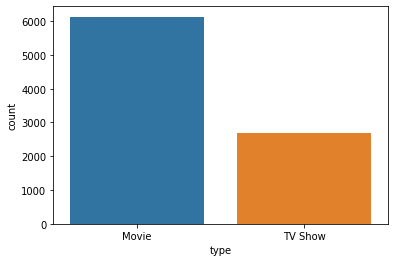

In [ ]:
sns.countplot(x=data['type'])
plt.show()

This bar plot shows that majority of the Netflix catalogue consists of movies.


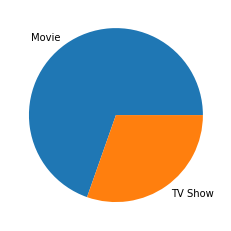

In [ ]:
labels=corrected_data['type'].unique().tolist()

plt.pie(data['type'].value_counts(),labels=labels)
plt.show()

Aproximatly 70:30 split between movies and TVshows.
The number of movie content on netflix in 2.33 times the TV Shows.

Genres 

In [ ]:
movie_data['genres'].value_counts().reset_index()

,index,genres
0,Dramas,29756
1,International Movies,28192
2,Comedies,20829
3,Action & Adventure,12216
4,Independent Movies,9818
5,Children & Family Movies,9771
6,Thrillers,7106
7,Romantic Movies,6412
8,Horror Movies,4571
9,Sci-Fi & Fantasy,4037


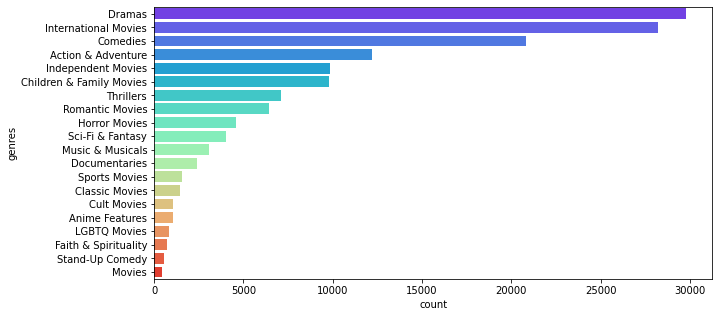

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(y = movie_data['genres'], order=movie_data['genres'].value_counts().index[:25],palette="rainbow")
plt.show()

Top 3 Genres in Movies:



*   Dramas
*   International Movies
*   Comedies










In [ ]:
TV_show_data['genres'].value_counts().reset_index()

,index,genres
0,International TV Shows,12837
1,TV Dramas,8933
2,TV Comedies,4914
3,Crime TV Shows,4715
4,Kids' TV,4562
5,Romantic TV Shows,3049
6,Anime Series,2295
7,TV Action & Adventure,2278
8,Spanish-Language TV Shows,2118
9,British TV Shows,1799


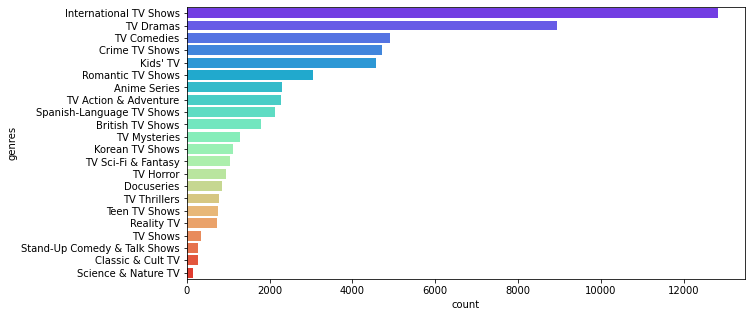

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(y = TV_show_data['genres'], order=TV_show_data['genres'].value_counts().index[:25],palette="rainbow")
plt.show()

Top 3 Genres in TV Shows:



*   International TV Shows
*   TV Dramas
*   TV Comedies

Country analysis

In [ ]:
countries_max=corrected_data['country'].value_counts().index[:10]
countries_max

Index(['United States', 'India', 'United Kingdom', 'Unknown', 'Japan',
       'France', 'Canada', 'Spain', 'South Korea', 'Germany'],
      dtype='object')

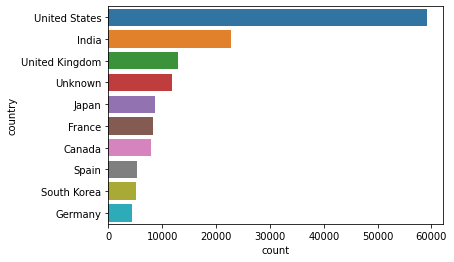

In [ ]:
sns.countplot(y=corrected_data['country'],order=countries_max)
plt.show()

United States has the maximum content available followed by India and United Kingdom

###release_year

In [ ]:
data['release_year'].value_counts()

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

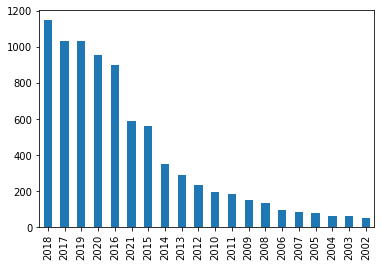

In [ ]:
data['release_year'].value_counts().head(20).plot(kind='bar')

Most number of contents were added at the 2018 followed by 2017 and 2019

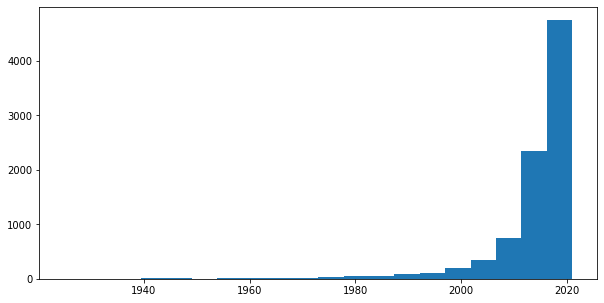

In [ ]:
plt.figure(figsize = (10,5))
plt.hist(data['release_year'],bins=20)
plt.show()

In recent years number of contents released has been doubled.

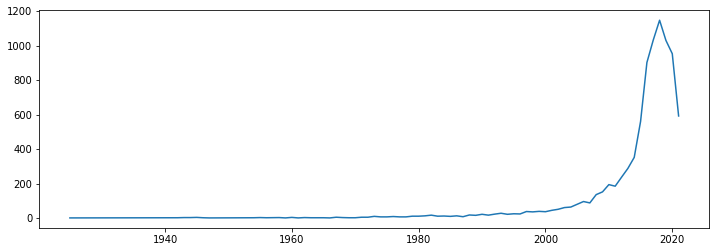

In [ ]:
plt.figure(figsize = (12,4))
rate_count = data['release_year'].value_counts()
sns.lineplot(x =rate_count.index , y= rate_count.values)

•	Due to the Covid Pandamic after 2019 there was a downfall in release contents.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


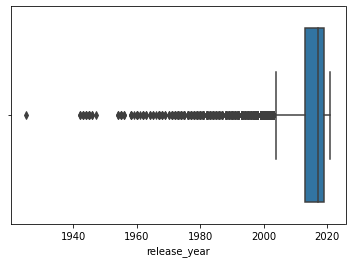

In [ ]:
sns.boxplot(data['release_year'])
plt.show()

In [ ]:
data.describe()

,release_year,year_added,month_added
count,8807.000000,8797.000000,8797.000000
mean,2014.180198,2018.871888,6.654996
std,8.819312,1.574243,3.436554
min,1925.000000,2008.000000,1.000000
25%,2013.000000,2018.000000,4.000000
50%,2017.000000,2019.000000,7.000000
75%,2019.000000,2020.000000,10.000000
max,2021.000000,2021.000000,12.000000




1. Netflix contets were mostly released between 2017 - 2021.
2. Highest number of contens were released at 2018.
3. Total movies released before 2017 are equal to total movies released 2017 to 2021














## Duration

we have two different types of contents 

1.   Movie( duration in minutes)
2.   TV Shows( duration in seasons)







--> Movie Duration

In [ ]:
data.loc[data.type=='Movie']
movie_data['duration'].value_counts()

94     4343
106    4040
97     3624
95     3560
96     3484
       ... 
20        4
5         3
9         2
8         2
11        2
Name: duration, Length: 205, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


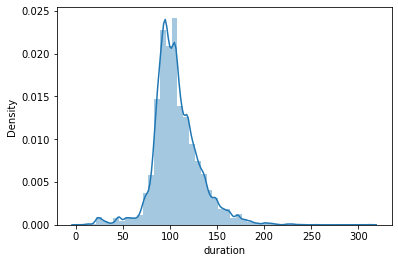

In [ ]:
sns.distplot(movie_data['duration'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


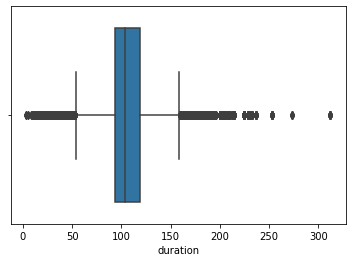

In [ ]:
sns.boxplot(movie_data['duration'])
plt.show()

In [ ]:
movie_data['duration'].describe()

count    145788.000000
mean        106.854330
std          24.700966
min           3.000000
25%          93.000000
50%         104.000000
75%         119.000000
max         312.000000
Name: duration, dtype: float64



*   The average movie time is 106 mins
*   maximum movies are in the range of 93 to 119 minutes



-->TV Show duration

In [ ]:
TV_show_data['duration'].value_counts()

1     35035
2      9485
3      5060
4      2129
5      1697
7       843
6       633
8       286
9       257
10      208
12      111
13      102
15       96
17       30
11       18
Name: duration, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


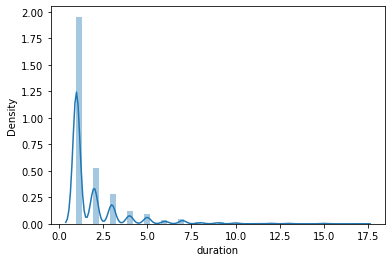

In [ ]:
sns.distplot(TV_show_data['duration'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


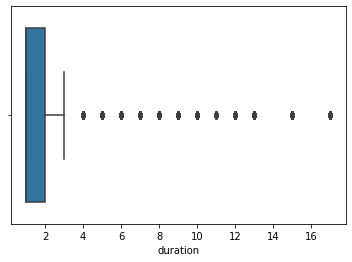

In [ ]:
sns.boxplot(TV_show_data['duration'])
plt.show()

In [ ]:
TV_show_data['duration'].describe()

count    55990.000000
mean         1.917700
std          1.786946
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         17.000000
Name: duration, dtype: float64



Most number of TV shows having only one season








## Rating 

In [ ]:
corrected_data['Types_audience']

0                   Teens
1         Mature Audience
2         Mature Audience
3         Mature Audience
4         Mature Audience
               ...       
201986              Teens
201987              Teens
201988              Teens
201989              Teens
201990              Teens
Name: Types_audience, Length: 201778, dtype: object

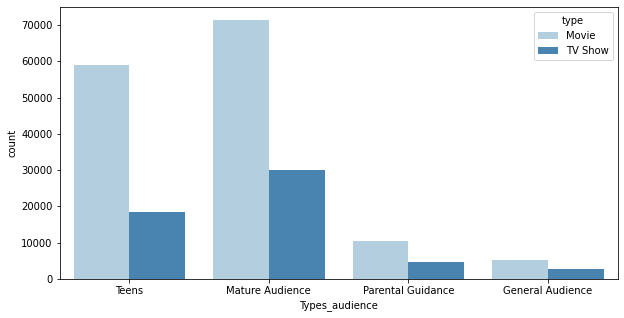

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x='Types_audience',data = corrected_data, palette = "Blues", hue="type")

For both Movies and TV shows there is more content for Mature Audience in Netflix followed by Teens and Parental Guidance

### added year vs release year

In [ ]:
data.groupby('title')['release_year','year_added'].sample()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,release_year,year_added
2036,2020,2020.0
2304,2019,2020.0
2481,2018,2020.0
2324,2020,2020.0
5973,2018,2019.0
...,...,...
6177,2012,2018.0
4914,2016,2018.0
7101,2015,2018.0
5022,2017,2018.0


In [ ]:
data['diff_release_and_added_year']=data['year_added']-data['release_year']

In [ ]:
data[data['diff_release_and_added_year']<=10].count()/data['diff_release_and_added_year'].count()*100

show_id                        86.302148
type                           86.302148
title                          86.302148
director                       57.962942
cast                           77.242242
country                        77.355917
date_added                     86.302148
release_year                   86.302148
rating                         86.256678
duration                       86.268046
listed_in                      86.302148
description                    86.302148
year_added                     86.302148
month_added                    86.302148
diff_release_and_added_year    86.302148
dtype: float64

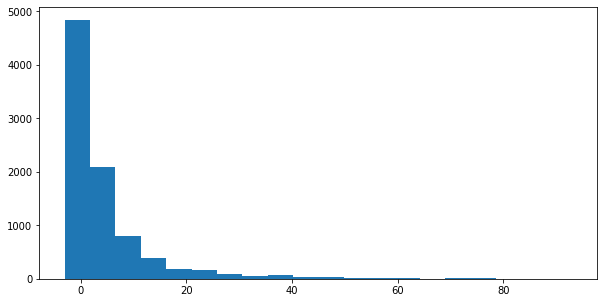

In [ ]:
plt.figure(figsize = (10,5))
plt.hist(data['diff_release_and_added_year'],bins=20)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


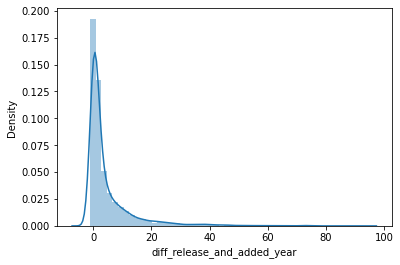

In [ ]:
sns.distplot(data['diff_release_and_added_year'])



*   Around 3241 contents were directly released/added in Netfix
*   87% contents were added to Netfilx with in 10 release dates



Director 

Movie director analysis

In [ ]:
movie_data['director'].value_counts()[1:]

Martin Scorsese        419
Youssef Chahine        409
Cathy Garcia-Molina    356
Steven Spielberg       355
Lars von Trier         336
                      ... 
John Smithson            1
Alex Coletti             1
Michael Govier           1
Sabaah Folayan           1
Kirsten Johnson          1
Name: director, Length: 4777, dtype: int64

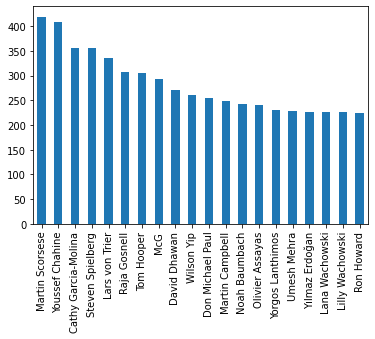

In [ ]:
movie_director=movie_data['director'].value_counts()[1:].head(20).plot(kind='bar')
movie_director

•	Martin Scorsese(419 Movies) is the most popular director followed by Youssef Chahine(409 Movies) and Cathy Garcia-Molina(356 Movies)

TV show director analysis

In [ ]:
TV_show_data['director'].value_counts()[1:]

Noam Murro          189
Thomas Astruc       160
Houda Benyamina     104
Damien Chazelle     104
Alan Poul           104
                   ... 
Rashida Jones         1
Sharon Grimberg       1
Garrett Bradley       1
Alex Gibney           1
Padraic McKinley      1
Name: director, Length: 299, dtype: int64

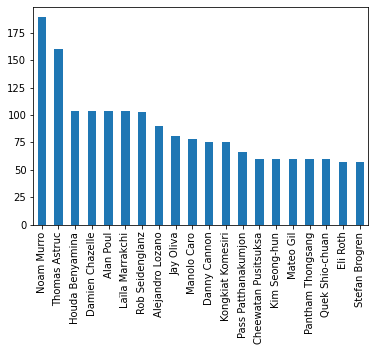

In [ ]:
TV_show_director=TV_show_data['director'].value_counts()[1:].head(20).plot(kind='bar')
TV_show_director

•	Noam Murro (189 Shows) is the most popular director followed by Thomas Astruc(160 Shows) and Houda Benyamina (104 Shows).

Genres vs Type of audience

Movie data analysis

Types_audience,General Audience,Mature Audience,Parental Guidance,Teens
genres,,,,
Action & Adventure,0.06,51.65,3.50,44.79
Anime Features,1.05,22.68,30.91,45.36
Children & Family Movies,27.37,0.21,11.09,61.32
Classic Movies,10.67,44.21,5.93,39.19
Comedies,4.37,39.53,7.61,48.49
Cult Movies,0.00,70.10,1.76,28.13
Documentaries,5.86,45.66,16.78,31.70
Dramas,1.08,55.01,6.65,37.27
Faith & Spirituality,0.28,11.68,30.88,57.16


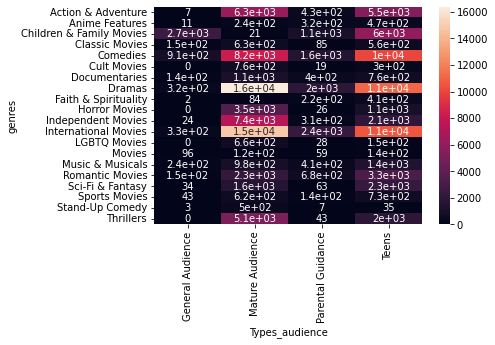

<Figure size 1440x720 with 0 Axes>

In [ ]:
movie_data=corrected_data.loc[corrected_data.type=='Movie']
sns.heatmap(pd.crosstab(movie_data['genres'], movie_data['Types_audience']), annot=True)
plt.figure(figsize = (20,10))
movie_genres_audience=pd.crosstab(movie_data['genres'], movie_data['Types_audience']).apply(lambda x: round((x/x.sum())*100,2), axis=1)
movie_genres_audience

In [ ]:
movie_genres_audience.sum()/movie_genres_audience.count()


Types_audience
General Audience      4.5005
Mature Audience      48.1665
Parental Guidance     9.0850
Teens                38.2475
dtype: float64

TV show analysis

Types_audience,General Audience,Mature Audience,Parental Guidance,Teens
genres,,,,
Anime Series,0.57,40.13,9.15,50.15
British TV Shows,14.06,55.64,17.01,13.29
Classic & Cult TV,3.85,39.23,13.85,43.08
Crime TV Shows,0.06,78.28,0.40,21.25
Docuseries,3.55,50.83,25.59,20.02
International TV Shows,0.46,62.04,6.24,31.26
Kids' TV,36.65,0.15,11.38,51.82
Korean TV Shows,6.33,35.92,7.22,50.53
Reality TV,7.07,23.13,40.95,28.84


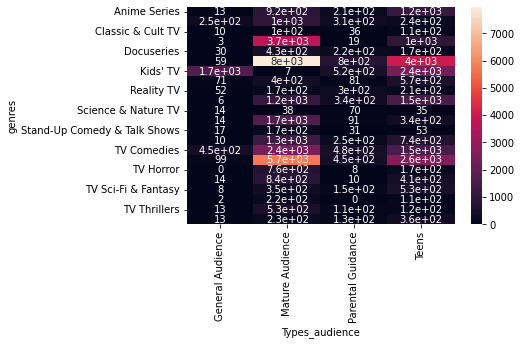

<Figure size 1440x720 with 0 Axes>

In [ ]:
TV_show_data=corrected_data.loc[corrected_data.type=='TV Show']
sns.heatmap(pd.crosstab(TV_show_data['genres'], TV_show_data['Types_audience']), annot=True)
plt.figure(figsize = (20,10))
TV_genres_audience=pd.crosstab(TV_show_data['genres'], TV_show_data['Types_audience']).apply(lambda x: round((x/x.sum())*100,2), axis=1)
TV_genres_audience

In [ ]:
TV_genres_audience.sum()/TV_genres_audience.count()

Types_audience
General Audience      4.790909
Mature Audience      50.241818
Parental Guidance    12.579091
Teens                32.386818
dtype: float64

In both movies and TV series most active audience are mature audience and Teens

## Month Analysis

Movie 

In [ ]:
movie_data['month_name']=movie_data['date_added'].dt.month_name()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


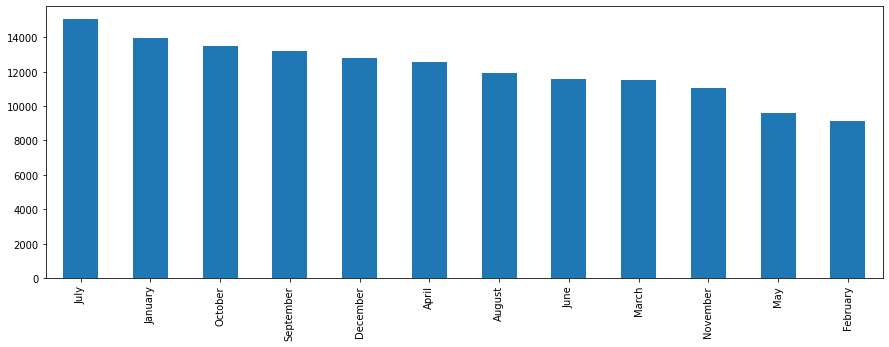

In [ ]:
plt.figure(figsize=(15,5))
movie_data['month_name'].value_counts().plot(kind='bar')

Most movies added at


1.   July
2.   January
3.   October







In [ ]:
TV_show_data['month_name']=TV_show_data['date_added'].dt.month_name()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


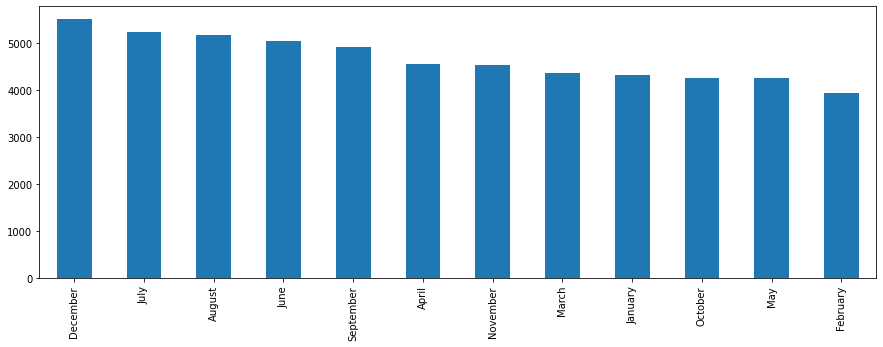

In [ ]:
plt.figure(figsize=(15,5))
TV_show_data['month_name'].value_counts().plot(kind='bar')

Most TV shows added at 

1.   December
2.   July
3.   August






Year added vs month_name

Movies added in each month of every year

In [ ]:
movie_year_month=movie_data.groupby('year_added')['month_name'].value_counts().unstack()

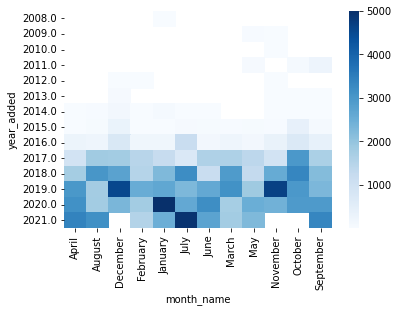

In [ ]:
sns.heatmap(movie_year_month,cmap="Blues")



*   Most movies addition in 2019 occured in November and then December
*   Most movies addition in 2020 occured in January and then April
*   Most movies addition in 2021 occured in July and then April






TV show

In [ ]:
TV_year_month=TV_show_data.groupby('year_added')['month_name'].value_counts().unstack()

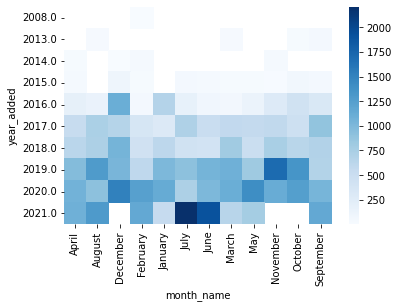

In [ ]:
sns.heatmap(TV_year_month,cmap="Blues")

*   Most TV Shows addition in 2019 occured in November and then December
*   Most TV Shows addition in 2020 occured in December and then May
*   Most TV Shows addition in 2021 occured in July and then june

## Movies vs TV shows in recent years.

In [ ]:
recent_year_movie=data.loc[(data.release_year >= 2019) & (data.type=='Movie')]

In [ ]:
recent_year_movie.count()/data.loc[data.type=='Movie'].count() * 100

show_id                        23.275159
type                           23.275159
title                          23.275159
director                       22.631668
cast                           22.648515
country                        20.998067
date_added                     23.275159
release_year                   23.275159
rating                         23.282754
duration                       23.286554
listed_in                      23.275159
description                    23.275159
year_added                     23.275159
month_added                    23.275159
diff_release_and_added_year    23.275159
dtype: float64

In recent years there 24% movies added 

In [ ]:
recent_year_TV=data.loc[(data.release_year >= 2019) & (data.type=='TV Show')]

In [ ]:
recent_year_TV.count()/data.loc[data.type=='TV Show'].count()*100

show_id                        42.899851
type                           42.899851
title                          42.899851
director                       56.086957
cast                           41.143594
country                        41.706783
date_added                     43.060765
release_year                   42.899851
rating                         42.931937
duration                       42.899851
listed_in                      42.899851
description                    42.899851
year_added                     43.060765
month_added                    43.060765
diff_release_and_added_year    43.060765
dtype: float64

In recent years there 43% TV shows added

## Insights:





*   In Netflix Number of movies(6131) is greater than Number of TV shows(2676)

*   Nearly 70 percent are movies and 30 percent are TV Shows
*   United States has the maximum content available followed by India and United Kingdom.

*   Most number of contents were added at the 2018 followed by 2017 and 2019.
*   In recent years number of contents released has been doubled.


*   Due to the Covid Pandamic after 2019 there was a downfall in release contents.


*   For both Movies and TV shows there is more content for Mature Audience in Netflix followed by Teens and Parental Guidance


*   Around 3241 contents were directly released/added in Netflix.

*   87% contents were added to Netflix within 10 release dates.

*   For recent years the release of Number of TV shows has been increased then Number of Movies. Which shows Netflix focuses more on TV shows.

*   There are two different type of time durations 




> 1.   Movies - Minutes

> 2.   TV Shows – Season

**Movie Analysis:**


*   The average movie time is 106 mins.


*   Maximum movies are in the range of 93 to 119 minutes.


*   Martin Scorsese (419 Movies) is the most popular director followed by Youssef Chahine(409 Movies) and Cathy Garcia-Molina(356 Movies).

*   Top 3 Genres in Movies:

> 1.	Dramas
2.	International Movies
3.	Comedies








*   Most movies added at

> 1.	July
2.	January
3.	October



*   After 2018 only 24% movies were added in the Netflix.

*   Most movies addition in 2019 occured in November and then December,Most movies addition in 2020 occured in January and then April,Most movies addition in 2021 occured in July and then April
*   Movies genres having the equal distribution among the types of audience.


*   92% of “Stand-up Comedy” genres were watched by Mature Audience.


TV Show Analysis:

*   Most number of TV shows having only one season.

*   Noam Murro (189 Shows) is the most popular director followed by Thomas Astruc(160 Shows) and Houda Benyamina (104 Shows).

*   •	Top 3 Genres in TV Shows:
1.	International TV Shows
2.	TV Dramas
3.	TV Comedies

*   •	Most TV shows added at
1.	December
2.	July
3.	August
*   After 2018 43% TV Shows were added in the Netflix.


*   Most TV Shows addition in 2019 occured in November and then December,Most TV Shows addition in 2020 occured in December and then May,Most TV Shows addition in 2021 occured in July and then june.


*   Parental Audience prefer to watch Reality shows.

Recommendation:
*  Netflix should focus on adding more movies or TV Shows related to Dramas and International Movies.


*   Netflix should add the movies which is having run time of 1.5 hr to 2hrs.
*   Netflix should add the TV shows which is having seasons less than 5.

*   Increase more contents on “Movies” genres.

*   Add more Stand-up Comedy Genres to increse Mature Audience .
*   To Increase the Parental Audience add more Reality shows.


*   If any Movie or TV Show has to be added to Netflix, the preferred months are July and January, because of Winter break in January and Summer break in July.